In [1]:
from IPython.display import Image
from math import sin, cos, radians
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

def dist(x1, y1, x2, y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  

## 2 Features

In [2]:
# Learn a rhombus with interior angles of 45° and 135°

In [3]:
# Generating data for an origin-centered rhombus centered at (0,0)
# By using hypotenuse length of 1
# I was able to find 4 vertexes that contain our rhombus
# They are [0, 1*sin(67.5)], [1*cos(67.5), 0], [0, -1*sin(67.5)], [-1*cos(67.5), 0]

npts = 10000

hyp = 1
vx1= -hyp*cos(radians(67.5))
vx2 = hyp*cos(radians(67.5))
vy1 = -hyp*sin(radians(67.5))
vy2 = hyp*sin(radians(67.5))

x = np.zeros((npts, 2))
y = np.zeros(npts)
for i in range(0, npts):
    y[i] = 1
    x[i,0] = np.random.uniform(-1.0,1.0) 
    x[i,1] = np.random.uniform(-1.0,1.0) 
    if(x[i,0] < vx1 or x[i,0] > vx2 or x[i,1] < vy1 or x[i,1] > vy2): # think of cropping out a square/rectangle
        y[i] = 0
    elif(x[i,0] > 0 and x[i,1] > 0): # quadrant 1
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x[i,0] > x2[j] and x[i,1] > y2[j]):
                y[i] = 0
                break
    elif(x[i,0] < 0 and x[i,1] > 0): # quadrant 2
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x[i,0] < x2[j] and x[i,1] > y2[j]):
                y[i] = 0
                break
    elif(x[i,0] < 0 and x[i,1] < 0): # quadrant 3
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x[i,0] < x2[j] and x[i,1] < y2[j]):
                y[i] = 0
                break
    else: # quadrant 4
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x[i,0] > x2[j] and x[i,1] < y2[j]):
                y[i] = 0
                break

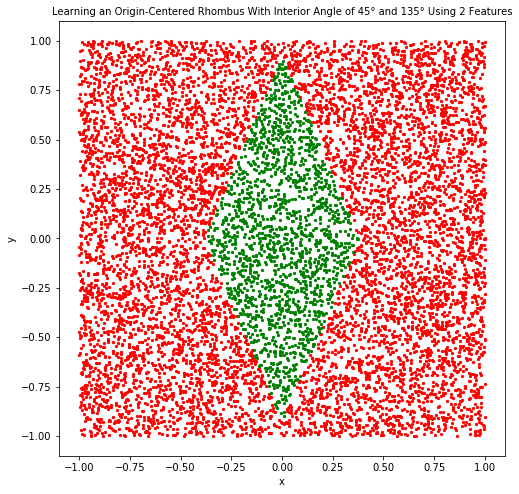

In [4]:
# Plot data

plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 2 Features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = x[y==0, 0], y = x[y==0, 1], color='red', label='0', s=5)
plt.scatter(x = x[y==1, 0], y = x[y==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [5]:
# Split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
         x, y, test_size=0.50, random_state=0)

In [6]:
# Fit for various depth trees
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth\tTraining\tTest')

for i in range(0, MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(x_train, y_train)

    x_combined = np.vstack((x_train, x_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(x_combined)
    #print(z)
    dp = tree.decision_path(x_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(x_train, y_train)
    Errors[i,1] = 1 - tree.score(x_test, y_test)
    print(i+1,"\t",Errors[i,0],"\t",Errors[i,1])

Max Depth	Training	Test
1 	 0.18179999999999996 	 0.18200000000000005
2 	 0.1472 	 0.16200000000000003
3 	 0.10599999999999998 	 0.12239999999999995
4 	 0.06599999999999995 	 0.07820000000000005
5 	 0.05879999999999996 	 0.0716
6 	 0.0534 	 0.06459999999999999
7 	 0.02959999999999996 	 0.04359999999999997
8 	 0.020399999999999974 	 0.03320000000000001
9 	 0.010800000000000032 	 0.026599999999999957
10 	 0.0046000000000000485 	 0.02080000000000004


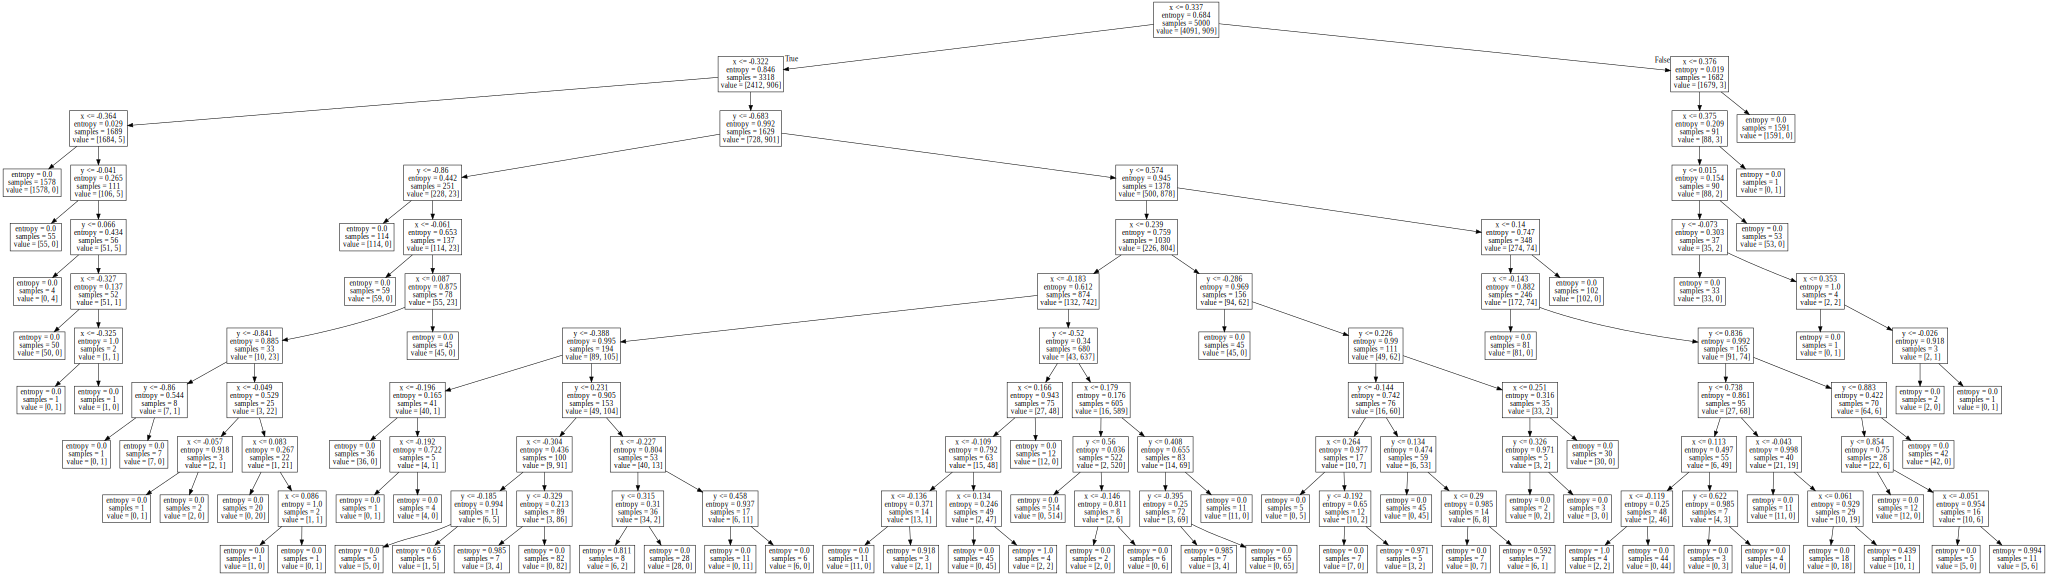

In [7]:
# Plot the final decision gree
export_graphviz(tree, out_file='T5.dot', feature_names=['x','y'])
with open('T5.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

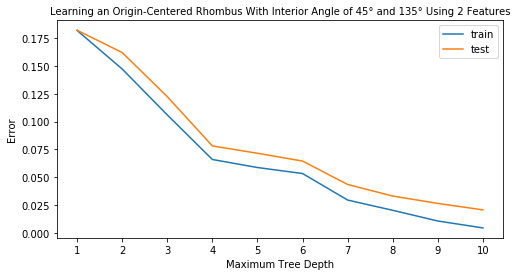

In [8]:
# Plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 2 Features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


## 4 Features

In [9]:
npts = 10000

x4 = np.zeros((npts,4))
y4 = np.zeros(npts)

hyp = 1
vx1= -hyp*cos(radians(67.5))
vx2 = hyp*cos(radians(67.5))
vy1 = -hyp*sin(radians(67.5))
vy2 = hyp*sin(radians(67.5))

for i in range(0,npts): 
    x4[i,0] = np.random.uniform(-1.0,1.0) 
    x4[i,1] = np.random.uniform(-1.0,1.0)
    x4[i,2] = abs(x4[i,0] / vx2) # ratio of x relative to vx2, which we call a, is the width from origin to the vertex
    x4[i,3] = abs(x4[i,1] / vy2) # ratio of y relative to vy2, which we call b, is the height from origin to the vertex
    y4[i] = 1
    
    
    if(x4[i,0] < vx1 or x4[i,0] > vx2 or x4[i,1] < vy1 or x4[i,1] > vy2): # think of cropping out a square/rectangle
        y4[i] = 0
    elif(x4[i,0] > 0 and x4[i,1] > 0): # quadrant 1
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x4[i,0] > x2[j] and x4[i,1] > y2[j]):
                y4[i] = 0
                break
    elif(x4[i,0] < 0 and x4[i,1] > 0): # quadrant 2
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x4[i,0] < x2[j] and x4[i,1] > y2[j]):
                y4[i] = 0
                break
    elif(x4[i,0] < 0 and x4[i,1] < 0): # quadrant 3
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x4[i,0] < x2[j] and x4[i,1] < y2[j]):
                y4[i] = 0
                break
    else: # quadrant 4
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x4[i,0] > x2[j] and x4[i,1] < y2[j]):
                y4[i] = 0
                break

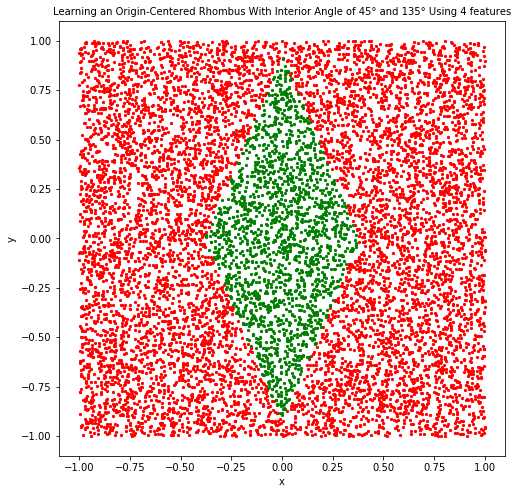

In [10]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 4 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = x4[y4==0, 0], y = x4[y4==0, 1], color='red', label='0', s=5)
plt.scatter(x = x4[y4==1, 0], y = x4[y4==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(
         x4, y4, test_size=0.50, random_state=0)


In [12]:
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth\tTraining\tTest')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(x4_train, y4_train)

    x4_combined = np.vstack((x4_train, x4_test))
    y4_combined = np.hstack((y4_train, y4_test))

    # optional outputs
    z = tree.apply(x4_combined)
    #print(z)
    dp = tree.decision_path(x4_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(x4_train,y4_train)
    Errors[i,1] = 1 - tree.score(x4_test,y4_test)
    print(i+1,"\t",Errors[i,0],"\t",Errors[i,1])

Max Depth	Training	Test
1 	 0.1472 	 0.1622
2 	 0.06840000000000002 	 0.07540000000000002
3 	 0.04820000000000002 	 0.06220000000000003
4 	 0.020199999999999996 	 0.026599999999999957
5 	 0.017199999999999993 	 0.0262
6 	 0.0043999999999999595 	 0.010600000000000054
7 	 0.0021999999999999797 	 0.009600000000000053
8 	 0.0006000000000000449 	 0.008600000000000052
9 	 0.0 	 0.007600000000000051
10 	 0.0 	 0.007600000000000051


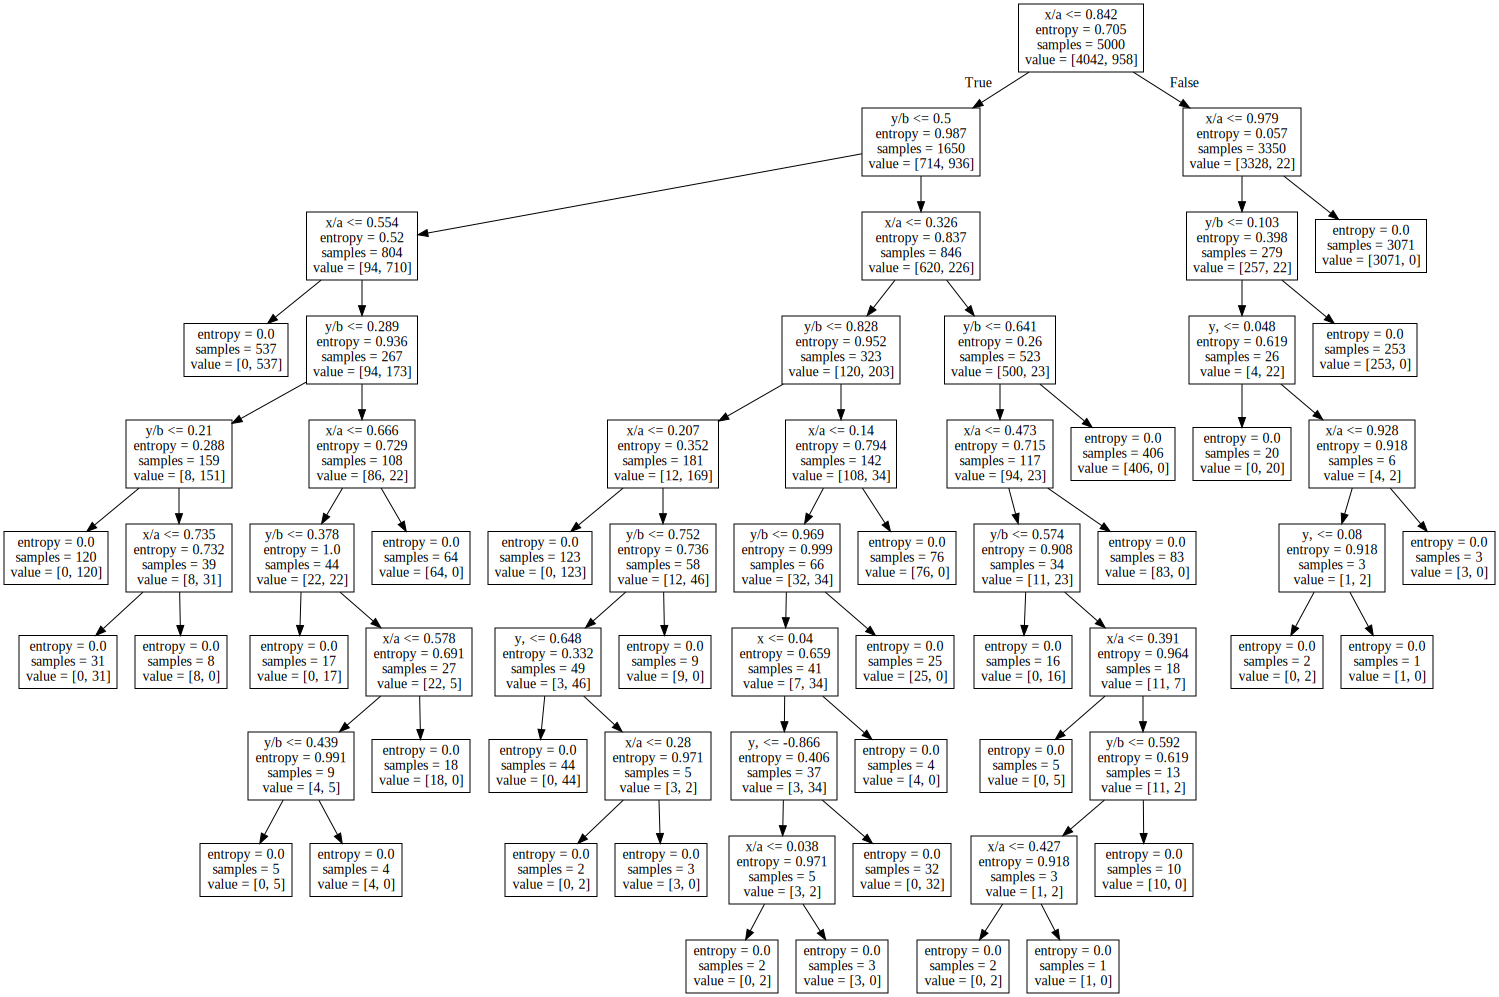

In [13]:
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x/a','y/b'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

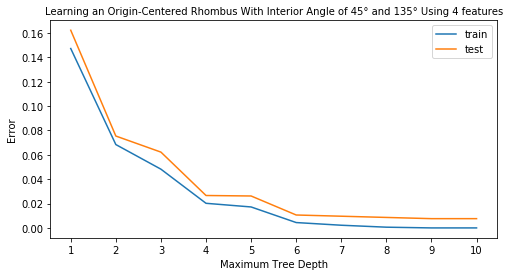

In [14]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


## 5 Features

In [15]:
npts = 10000

x5 = np.zeros((npts,5))
y5 = np.zeros(npts)

hyp = 1
vx1= -hyp*cos(radians(67.5))
vx2 = hyp*cos(radians(67.5))
vy1 = -hyp*sin(radians(67.5))
vy2 = hyp*sin(radians(67.5))

for i in range(0,npts): 
    x5[i,0] = np.random.uniform(-1.0,1.0) 
    x5[i,1] = np.random.uniform(-1.0,1.0)
    x5[i,2] = abs(x5[i,0] / vx2) # ratio of x relative to vx2, which we call a, is the width from origin to the vertex
    x5[i,3] = abs(x5[i,1] / vy2) # ratio of y relative to vy2, which we call b, is the height from origin to the vertex
    x5[i,4] = x5[i,2] + x5[i,3] # based on a rhombus formula that a point belongs in it if x/a + y/b <= 1
    y5[i] = 1                   # where a is the distance from origin to vx2 and b is the distance from origin to vy2
    
    
    if(x5[i,0] < vx1 or x5[i,0] > vx2 or x5[i,1] < vy1 or x5[i,1] > vy2): # think of cropping out a square/rectangle
        y5[i] = 0
    elif(x5[i,0] > 0 and x5[i,1] > 0): # quadrant 1
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x5[i,0] > x2[j] and x5[i,1] > y2[j]):
                y5[i] = 0
                break
    elif(x5[i,0] < 0 and x5[i,1] > 0): # quadrant 2
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy2, 0, num=1000)
        for j in range(len(x2)):
            if(x5[i,0] < x2[j] and x5[i,1] > y2[j]):
                y5[i] = 0
                break
    elif(x5[i,0] < 0 and x5[i,1] < 0): # quadrant 3
        x2 = np.linspace(0, vx1, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x5[i,0] < x2[j] and x5[i,1] < y2[j]):
                y5[i] = 0
                break
    else: # quadrant 4
        x2 = np.linspace(0, vx2, num=1000)
        y2 = np.linspace(vy1, 0, num=1000)
        for j in range(len(x2)):
            if(x5[i,0] > x2[j] and x5[i,1] < y2[j]):
                y5[i] = 0
                break

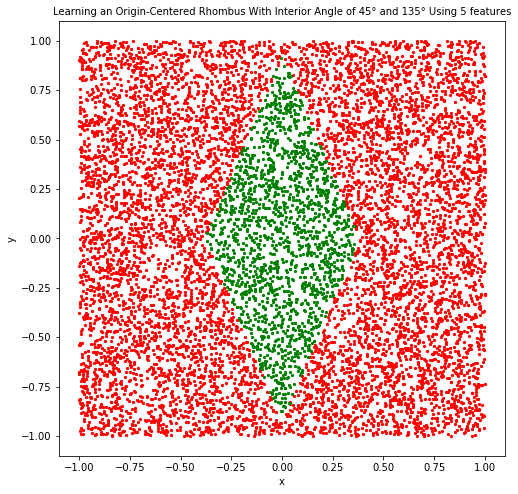

In [16]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 5 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = x5[y5==0, 0], y = x5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = x5[y5==1, 0], y = x5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x5_train, x5_test, y5_train, y5_test = train_test_split(
         x5, y5, test_size=0.50, random_state=0)


In [18]:
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth\tTraining\tTest')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(x5_train, y5_train)

    x5_combined = np.vstack((x5_train, x5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(x5_combined)
    #print(z)
    dp = tree.decision_path(x5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(x5_train,y5_train)
    Errors[i,1] = 1 - tree.score(x5_test,y5_test)
    print(i+1,"\t",Errors[i,0],"\t",Errors[i,1])

Max Depth	Training	Test
1 	 0.00039999999999995595 	 0.00019999999999997797
2 	 0.00039999999999995595 	 0.0
3 	 0.0 	 0.0
4 	 0.0 	 0.0
5 	 0.0 	 0.0
6 	 0.0 	 0.0
7 	 0.0 	 0.0
8 	 0.0 	 0.0
9 	 0.0 	 0.0
10 	 0.0 	 0.0


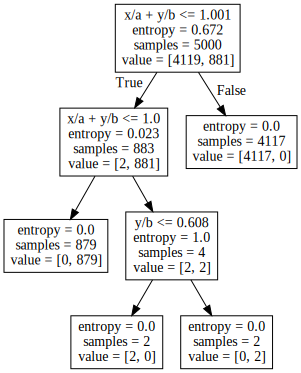

In [19]:
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x/a','y/b','x/a + y/b'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

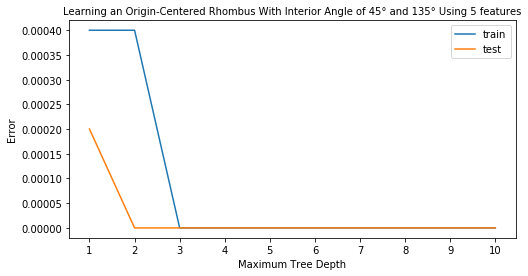

In [20]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Rhombus With Interior Angle of 45° and 135° Using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


## Discussion

For this assignment, I started off on training my machine by using 2 features, which were the location of x and y. The results were not beautiful. Even after 10 depths, my machine never reached a point where it had 0 errors in identifying the specific rhombus. The tree went on and on until the 10th level and even then there were still entrophies that were > 0.

I moved on to research on how one can identify if a point is inside a rhombus and I came across this formula(https://i.gyazo.com/83d535140e285ad12fd3a037fcf05d25.png). I can just directly plug this in but first I wanted to see how the machine would train if I just added 2 more features, which were the width and height, or a and b, of the vertices from the origin. The results were a little better than just using the x and the y. At the 10th depth, my machine was able to correctly identify the specific rhombus with 0 errors. And the error from other depths are significantly lower than the error from the same depth of the 2 feature model.

Lastly, I moved on to 5 features using a and b to create a relationship of x/a + y/b. According to my source, if x/a + y/b is equal to or less than 1, then the point is within the rhombus. I put it in and hoped that the machine can identify that and with it make no errors in identifying the rhombus.

And surprise! I was correct, the machine was able to identify the rhombus 100% of the time using this formula with no errors starting from the 1st depth, which was really amazing to me. If you look at the decision tree, you can see that it says x/a + y/b is less than or equal to 1.001 which is really close to my formula.

One thing I learned is that if you train your machine correctly, using the right logic, it'll get better as long as it's correct.